![](https://i.imgur.com/8aJqT1E.jpg)

## Exploratory Analysis

### Analysis on Battles
1. Number of battles per year
2. Most attacker and defender commander
3. Number of battles per region and location
4. Most Attacker and defender kings per battle
5. Common battle type

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set(style="darkgrid")

In [2]:
# importing the libraries
df_battles = pd.read_csv("../input/battles.csv")
df_character_predictions = pd.read_csv("../input/character-predictions.csv")
df_character_deaths = pd.read_csv("../input/character-deaths.csv")

In [3]:
character_deaths_df = pd.read_csv("../input/character-deaths.csv")
character_deaths_df.head()

,Name,Allegiances,Death Year,Book of Death,Death Chapter,Book Intro Chapter,Gender,Nobility,GoT,CoK,SoS,FfC,DwD
0,Addam Marbrand,Lannister,NaN,NaN,NaN,56.0,1,1,1,1,1,1,0
1,Aegon Frey (Jinglebell),None,299.0,3.0,51.0,49.0,1,1,0,0,1,0,0
2,Aegon Targaryen,House Targaryen,NaN,NaN,NaN,5.0,1,1,0,0,0,0,1
3,Adrack Humble,House Greyjoy,300.0,5.0,20.0,20.0,1,1,0,0,0,0,1
4,Aemon Costayne,Lannister,NaN,NaN,NaN,NaN,1,1,0,0,1,0,0


## 1. Analysis on Battles

In [4]:
# displaying data deaths
df_battles.head()

,name,year,battle_number,attacker_king,defender_king,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,...,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note
0,Battle of the Golden Tooth,298,1,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,1.0,0.0,15000.0,4000.0,Jaime Lannister,"Clement Piper, Vance",1.0,Golden Tooth,The Westerlands,NaN
1,Battle at the Mummer's Ford,298,2,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Baratheon,...,1.0,0.0,NaN,120.0,Gregor Clegane,Beric Dondarrion,1.0,Mummer's Ford,The Riverlands,NaN
2,Battle of Riverrun,298,3,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,0.0,1.0,15000.0,10000.0,"Jaime Lannister, Andros Brax","Edmure Tully, Tytos Blackwood",1.0,Riverrun,The Riverlands,NaN
3,Battle of the Green Fork,298,4,Robb Stark,Joffrey/Tommen Baratheon,Stark,NaN,NaN,NaN,Lannister,...,1.0,1.0,18000.0,20000.0,"Roose Bolton, Wylis Manderly, Medger Cerwyn, H...","Tywin Lannister, Gregor Clegane, Kevan Lannist...",1.0,Green Fork,The Riverlands,NaN
4,Battle of the Whispering Wood,298,5,Robb Stark,Joffrey/Tommen Baratheon,Stark,Tully,NaN,NaN,Lannister,...,1.0,1.0,1875.0,6000.0,"Robb Stark, Brynden Tully",Jaime Lannister,1.0,Whispering Wood,The Riverlands,NaN


### Cleaning and condensing the deaths database

In [5]:
df_battles = df_battles.drop(['attacker_2', 'attacker_3', 'attacker_4', 'defender_2', 'defender_3', 'defender_4', 'note'], axis=1)

In [6]:
sum(df_battles.duplicated())

0

In [7]:
df_battles.isnull().sum()

name                   0
year                   0
battle_number          0
attacker_king          2
defender_king          3
attacker_1             0
defender_1             1
attacker_outcome       1
battle_type            1
major_death            1
major_capture          1
attacker_size         14
defender_size         19
attacker_commander     1
defender_commander    10
summer                 1
location               1
region                 0
dtype: int64

### 1.1 Number of battles per year

Text(0,0.5,'Number of battles')

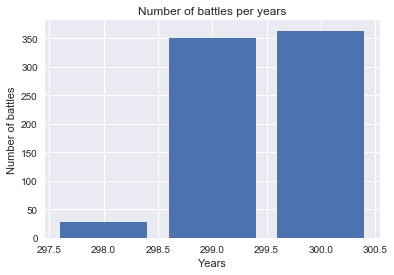

In [8]:
# selecting data and run the model
df_battles_per_year = df_battles.groupby('year',as_index=False).sum()
plt.bar(df_battles_per_year['year'], df_battles_per_year['battle_number'])
plt.title('Number of battles per years')
plt.xlabel('Years')
plt.ylabel('Number of battles')

### 1.2 Most attacker and defender commander

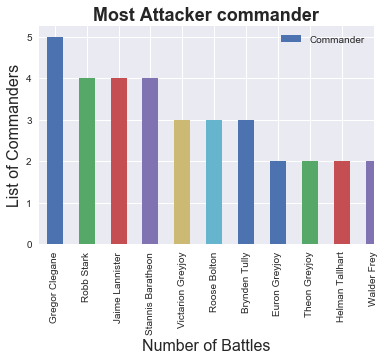

In [9]:
most_pop_genres = df_battles['attacker_commander'].str.cat(sep=', ').split(', ')
most_pop_genres = pd.Series(most_pop_genres).value_counts(ascending=False) 
graph = most_pop_genres.plot.bar()
graph.set_title("Most Attacker commander", fontsize=18, fontweight='bold')
graph.set_xlabel("Number of Battles", fontsize=16)
graph.set_ylabel("List of Commanders", fontsize=16)
graph.set_xlim(right=10)
graph.legend(['Commander'], loc = "upper right")

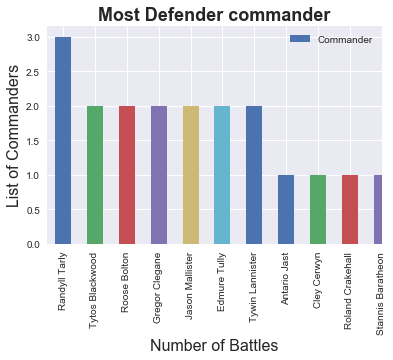

In [10]:
most_pop_genres = df_battles['defender_commander'].str.cat(sep=', ').split(', ')
most_pop_genres = pd.Series(most_pop_genres).value_counts(ascending=False) 
graph = most_pop_genres.plot.bar()
graph.set_title("Most Defender commander", fontsize=18, fontweight='bold')
graph.set_xlabel("Number of Battles", fontsize=16)
graph.set_ylabel("List of Commanders", fontsize=16)
graph.set_xlim(right=10)
graph.legend(['Commander'], loc = "upper right")

### 1.3 Number of battles per region and location

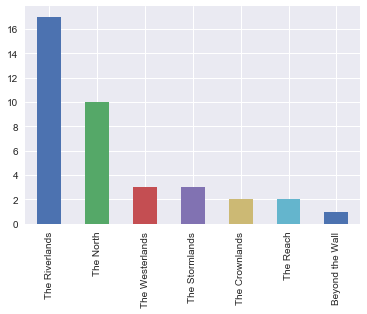

In [11]:
df_battles["region"].value_counts().plot(kind = 'bar')

In [12]:
df_character_deaths.head()

,Name,Allegiances,Death Year,Book of Death,Death Chapter,Book Intro Chapter,Gender,Nobility,GoT,CoK,SoS,FfC,DwD
0,Addam Marbrand,Lannister,NaN,NaN,NaN,56.0,1,1,1,1,1,1,0
1,Aegon Frey (Jinglebell),None,299.0,3.0,51.0,49.0,1,1,0,0,1,0,0
2,Aegon Targaryen,House Targaryen,NaN,NaN,NaN,5.0,1,1,0,0,0,0,1
3,Adrack Humble,House Greyjoy,300.0,5.0,20.0,20.0,1,1,0,0,0,0,1
4,Aemon Costayne,Lannister,NaN,NaN,NaN,NaN,1,1,0,0,1,0,0


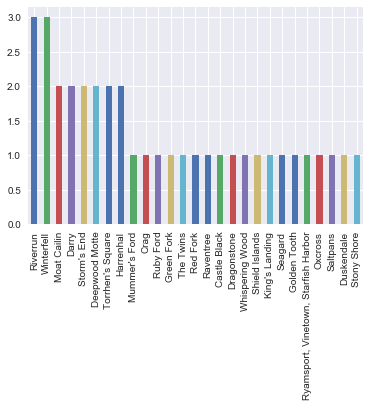

In [13]:
df_battles['location'].value_counts().plot(kind = 'bar')

### 1.4 Most Attacker and defender kings per battle


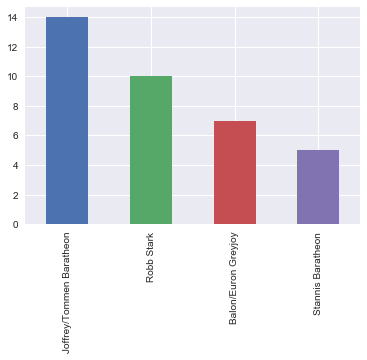

In [14]:
df_battles['attacker_king'].value_counts().plot(kind = 'bar')

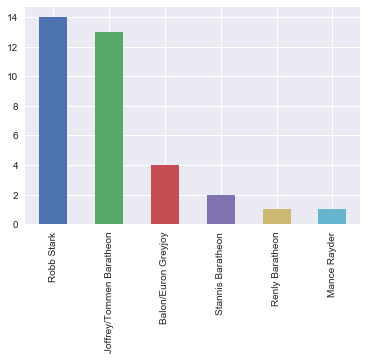

In [15]:
df_battles['defender_king'].value_counts().plot(kind = 'bar')

### 1.5 Common battle type

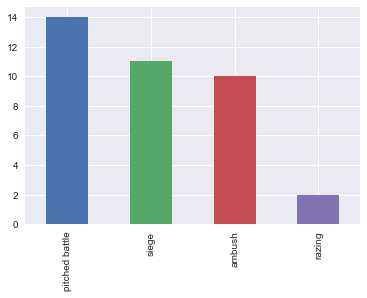

In [16]:
df_battles['battle_type'].value_counts().plot(kind = 'bar')

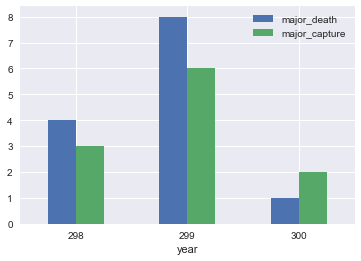

In [17]:
df_battles.groupby('year').sum()[['major_death','major_capture']].plot.bar(rot=0)

### Conclusion:
Hence we have done analysis on battles data for the game of thrones data and have calculated the number of battles per common battle regions and battle land, attacker and defender kings, commander for the same. 

![](https://i.imgur.com/xHwhCeug.jpg)

## Valar morghulis
To know more about me go to my website https://krunal3kapadiya.app/ <br>
If you like this kernel, don't forgot to  **upvote** it.

### References:
https://www.kaggle.com/shaildeliwala/exploratory-analysis-and-predictions